In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Copy data from drive to collab
!cp -r /content/drive/MyDrive/data /content/

In [3]:
#update dir to local copy
data_dir = "/content/data"

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [6]:
train_dir = f"{data_dir}/train"
val_dir = f"{data_dir}/val"

In [ ]:
# Transformations for train and validation data
transform = {
    "train": transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.Resize(256),
        transforms.CenterCrop((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
    "val": transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.Resize(256),
        transforms.CenterCrop((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
}

In [8]:
# Sort numerically
def sorted_class_to_idx(folder_path):
    class_names = sorted(os.listdir(folder_path), key=lambda x: int(x))
    return {class_name: i for i, class_name in enumerate(class_names)}

train_class_to_idx = sorted_class_to_idx(train_dir)
val_class_to_idx = sorted_class_to_idx(val_dir)

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform["train"])
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform["val"])

train_dataset.class_to_idx = train_class_to_idx
val_dataset.class_to_idx = val_class_to_idx

print("Train class-to-idx mapping:", train_dataset.class_to_idx)
print("Val class-to-idx mapping:", val_dataset.class_to_idx)

Train class-to-idx mapping: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 81, '82': 82, '83': 83, '84': 84, '85': 85, '86': 86, '87': 87, '88': 88, '89': 89, '90': 90, '91': 91, '92': 92, '93': 93, '94': 94, '95': 95, '96': 96, '97': 97, '98': 98, '

In [9]:
# Data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

In [10]:
print(train_dataset.class_to_idx)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 81, '82': 82, '83': 83, '84': 84, '85': 85, '86': 86, '87': 87, '88': 88, '89': 89, '90': 90, '91': 91, '92': 92, '93': 93, '94': 94, '95': 95, '96': 96, '97': 97, '98': 98, '99': 99}


In [11]:
model = models.resnet50(pretrained=True)
model = nn.Sequential(*list(model.children())[:-2])

# Custom Classifier added
class CustomClassifier(nn.Module):
    def __init__(self, backbone, num_classes=100):
        super(CustomClassifier, self).__init__()
        self.backbone = backbone
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Sequential(
            nn.Linear(2048, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

model = CustomClassifier(model, num_classes=100).to(device)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Mar 25 06:02:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             52W /  400W |     541MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [13]:
optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=2)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

In [14]:
epochs = 15
train_losses = []
val_accuracies = []

#Train
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=epochs):

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        total_train = 0

        print(f"Epoch {epoch+1}/{epochs}")
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels).item()
            total_train += labels.size(0)

        train_accuracy = 100 * train_correct / total_train
        train_loss /= len(train_loader)
        train_losses.append(train_loss / len(train_loader))

        # Validation
        model.eval()
        val_correct = 0
        val_loss = 0.0
        total_val = 0

        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels).item()
                total_val += labels.size(0)

        val_accuracy = 100 * val_correct / total_val
        val_loss /= len(val_loader)
        val_accuracies.append(val_accuracy)

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

        scheduler.step()

        torch.save(model.state_dict(), f"model_epoch_{epoch+1}.pth")

train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=epochs)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Train Loss: 2.9197, Train Acc: 39.03% | Val Loss: 2.9843, Val Acc: 32.00%
Epoch 2/15
Train Loss: 2.0907, Train Acc: 61.40% | Val Loss: 2.4166, Val Acc: 46.67%
Epoch 3/15
Train Loss: 1.6351, Train Acc: 76.19% | Val Loss: 1.8837, Val Acc: 66.00%
Epoch 4/15
Train Loss: 1.8818, Train Acc: 68.20% | Val Loss: 2.2831, Val Acc: 55.00%
Epoch 5/15
Train Loss: 1.7010, Train Acc: 74.44% | Val Loss: 2.1032, Val Acc: 61.00%
Epoch 6/15
Train Loss: 1.4927, Train Acc: 81.03% | Val Loss: 2.1094, Val Acc: 59.67%
Epoch 7/15
Train Loss: 1.4736, Train Acc: 81.88% | Val Loss: 1.7209, Val Acc: 72.67%
Epoch 8/15
Train Loss: 1.2025, Train Acc: 90.72% | Val Loss: 1.5712, Val Acc: 76.67%
Epoch 9/15
Train Loss: 1.1076, Train Acc: 93.91% | Val Loss: 1.5857, Val Acc: 76.67%
Epoch 10/15
Train Loss: 1.4902, Train Acc: 80.78% | Val Loss: 1.9410, Val Acc: 67.00%
Epoch 11/15
Train Loss: 1.3759, Train Acc: 84.83% | Val Loss: 2.0540, Val Acc: 64.33%
Epoch 12/15
Train Loss: 1.5522, Train Acc: 79.07% | Val Loss: 1.8391, Val 

In [15]:
# Calculate number of parameters
sum(p.numel() for p in model.parameters())

24609444

In [16]:
# Load saved model for prediction
model.load_state_dict(torch.load("model_epoch_15.pth", map_location=device), strict=False)
model.eval()

✅ Predictions saved to prediction.csv


In [ ]:
# Test transformation
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_dir = f"{data_dir}/test"
test_images = [img for img in os.listdir(test_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

test_data = [Image.open(os.path.join(test_dir, img_name)).convert("RGB") for img_name in test_images]

In [ ]:
# Predict the class for test images
predictions = []

for img_name, img in zip(test_images, test_data):
    img = test_transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img)
        _, pred = torch.max(output, 1)

    pred_label = train_dataset.classes[pred.item()]
    predictions.append((img_name, pred_label))

In [ ]:
# Save predictions to prediction.csv
submission_file = "prediction.csv"
with open(submission_file, 'w') as f:
    f.write('image_name,pred_label\n')
    for img_id, pred in predictions:
        img_id_without_extension = os.path.splitext(img_id)[0]
        f.write(f"{img_id_without_extension},{pred}\n")

print(f"Prediction file saved to {submission_file}")

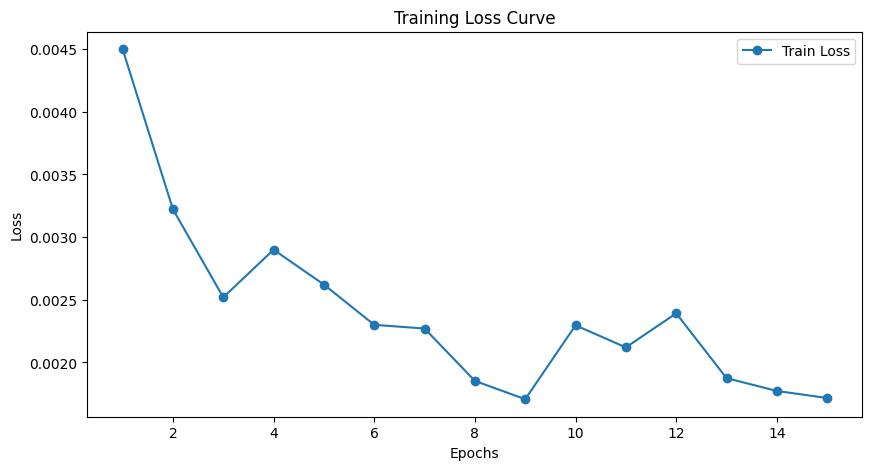

In [17]:
# Training loss plot
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), train_losses, marker='o', label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.savefig("training_loss.png")
plt.show()

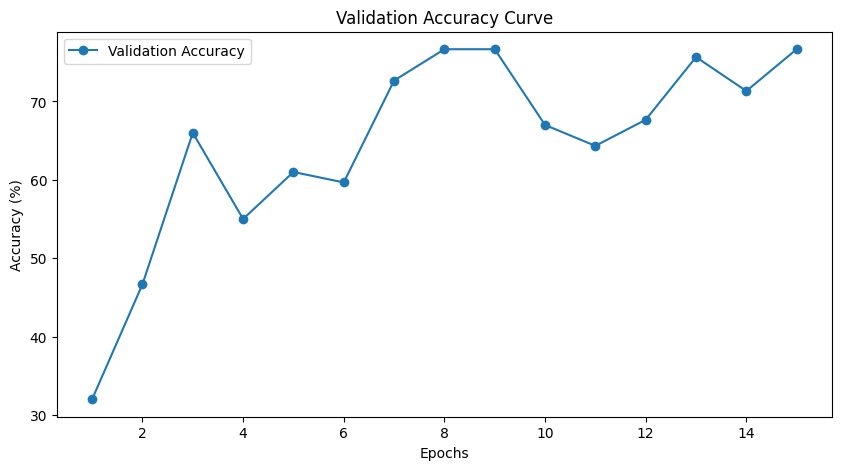

In [18]:
# Validation accuracy plot
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), val_accuracies, marker='o', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Validation Accuracy Curve")
plt.legend()
plt.savefig("validation_accuracy.png")
plt.show()